In [1]:
from pandas_ods_reader import read_ods
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data
p_change = read_ods('./data/datasets/2007-2020-PIT-Percent-Change-Estimates-by-state.ods',1)
# melt from wide to long
co_p_change = p_change[p_change['State']=='CO'].melt(id_vars = ['State'])
# drop first row created by melt
co_p_change.drop(index = 0, inplace = True)
# clean the year column and rename column titles
co_p_change['variable'] = [ title.split(',')[1].split('-')[0] for title in  co_p_change['variable'] ]
co_p_change.rename(columns = {'variable':'Year','value':'P_change'} , inplace = True)
# set index to datetime and sort
co_p_change.set_index( pd.to_datetime(co_p_change['Year']), inplace = True)
co_p_change.sort_index(inplace = True)

In [3]:
co_p_change

,State,Year,P_change
Year,,,
2007-01-01,CO,2007,-0.307838
2008-01-01,CO,2008,-0.332339
2009-01-01,CO,2009,-0.355122
2010-01-01,CO,2010,-0.364036
2011-01-01,CO,2011,-0.348637
2012-01-01,CO,2012,-0.41281
2013-01-01,CO,2013,0.009432
2014-01-01,CO,2014,-0.018149
2015-01-01,CO,2015,-0.010751


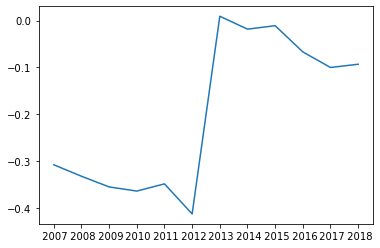

In [4]:
plt.plot(co_p_change['Year'],co_p_change['P_change'],)

In [5]:
count_df = pd.DataFrame()
# df_list = []
for i in range(2,16):
    # for each sheet in the ods file
    df = read_ods('./data/datasets/2007-2020-PIT-Percent-Change-Estimates-by-state.ods', i )
    # only take colorado data
    df = df[df['State']=='CO']
    
    # get the date from the overall homelessness column
    date = df.columns[2].split(',')[1]
    df['Date'] = date
    for col in df:
        # select columns with date in title
        if col.endswith(date) == True:
            # remove date from title
            new_col = col.split(',')[0]
            # create new column with dateless title
            df[f'{new_col}'] = df[f'{col}']
            # drop column with dated title
            df.drop(columns = [f'{col}'], inplace = True)
    # progress report         
    print(f'Finished itter: {i}' )
    count_df = pd.concat([count_df, df.reset_index() ], ignore_index = False) 
# complete 
print('Done')
# set index to datetime and sort 
count_df.set_index( pd.to_datetime(count_df['Date'])  ,inplace = True)
count_df.sort_index(inplace = True)

Finished itter: 2
Finished itter: 3
Finished itter: 4
Finished itter: 5
Finished itter: 6
Finished itter: 7
Finished itter: 8
Finished itter: 9
Finished itter: 10
Finished itter: 11
Finished itter: 12
Finished itter: 13
Finished itter: 14
Finished itter: 15
Done


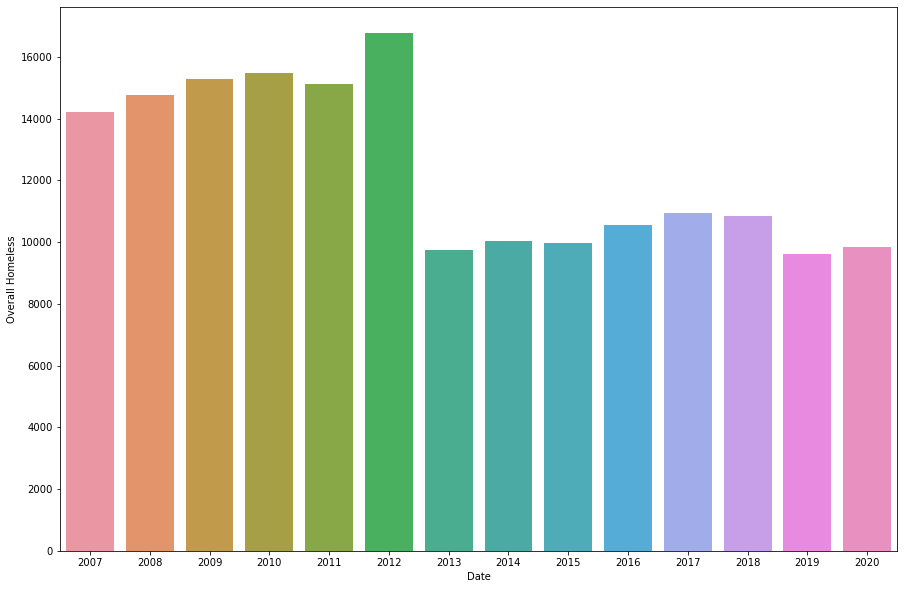

In [6]:
plt.figure(figsize = (15,10))
sns.barplot(x = count_df.index, y= count_df['Overall Homeless'], orient='v' );
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']);


In [7]:
count_df.dtypes

index                                                     int64
State                                                    object
Number of CoCs                                          float64
Date                                                     object
Overall Homeless                                         object
                                                         ...   
Overall Homeless Children of Parenting Youth            float64
Sheltered ES Homeless Children of Parenting Youth       float64
Sheltered TH Homeless Children of Parenting Youth       float64
Sheltered Total Homeless Children of Parenting Youth    float64
Unsheltered Homeless Children of Parenting Youth        float64
Length: 543, dtype: object

In [11]:
for col in count_df:
    if col != 'State':
        if col != 'Date':
            count_df[f'{col}'] = count_df[f'{col}'].fillna(count_df[f'{col}'].mean())

In [12]:
for col in count_df.columns:
    check = ['index','State']
    if col not in check:
        count_df[f'{col}'] = count_df[f'{col}'].astype(int)

In [17]:
count_df.columns

Index(['index', 'State', 'Number of CoCs', 'Date', 'Overall Homeless',
       'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male',
       ...
       'Overall Homeless Parenting Youth Age 18-24',
       'Sheltered ES Homeless Parenting Youth Age 18-24',
       'Sheltered TH Homeless Parenting Youth Age 18-24',
       'Sheltered Total Homeless Parenting Youth Age 18-24',
       'Unsheltered Homeless Parenting Youth Age 18-24',
       'Overall Homeless Children of Parenting Youth',
       'Sheltered ES Homeless Children of Parenting Youth',
       'Sheltered TH Homeless Children of Parenting Youth',
       'Sheltered Total Homeless Children of Parenting Youth',
       'Unsheltered Homeless Children of Parenting Youth'],
      dtype='object', length=543)

Text(0.5, 1.0, 'Homeless Veterans')

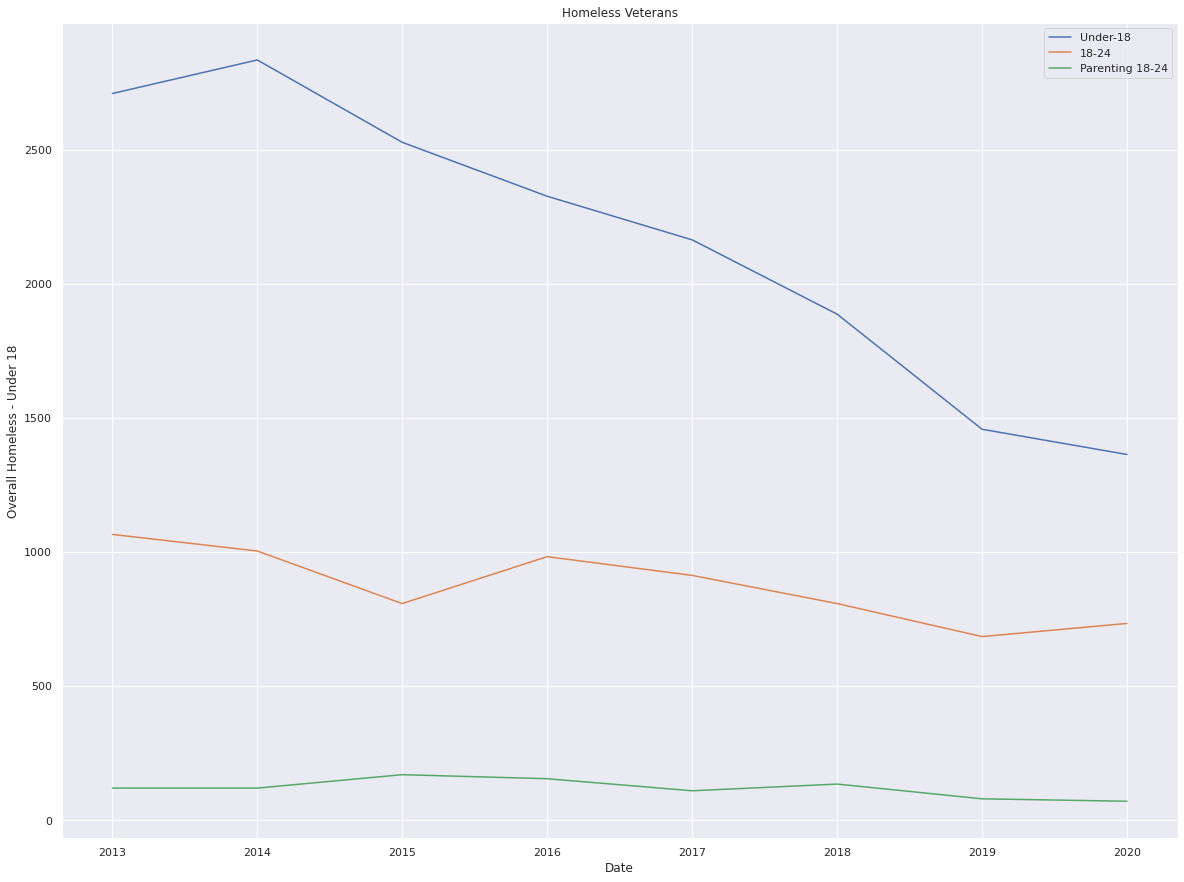

In [29]:
sns.set()
plt.figure(figsize = (20,15))
sns.lineplot(x = count_df.index[6:], y = count_df['Overall Homeless - Under 18'][6:], label = 'Under-18')
sns.lineplot(x = count_df.index[6:], y = count_df['Overall Homeless - Age 18 to 24'][6:], label = '18-24')
sns.lineplot(x = count_df.index[6:], y = count_df['Overall Homeless Parenting Youth Age 18-24'][6:], label = 'Parenting 18-24')

plt.title('Homeless Veterans')

(5.5, 13.5)

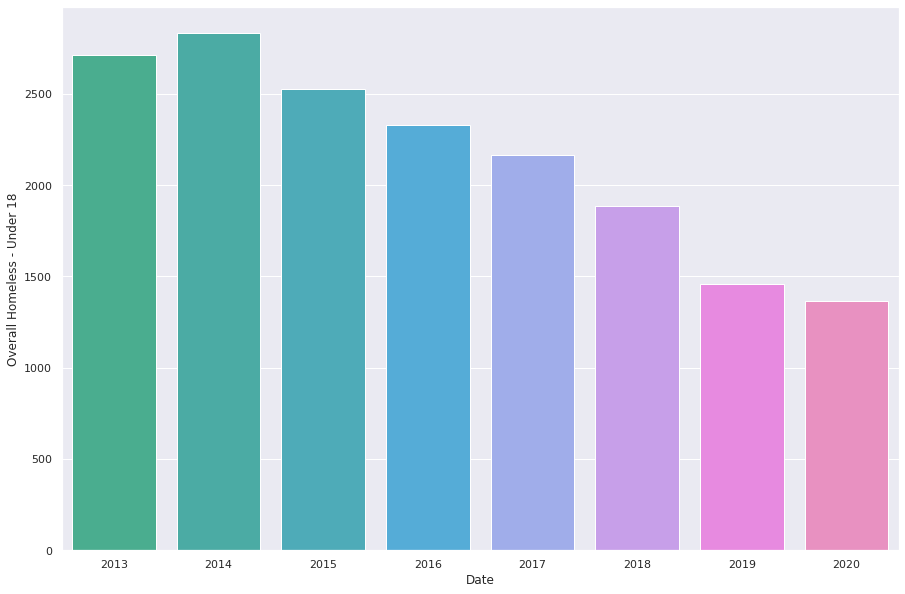

In [30]:
plt.figure(figsize = (15,10))
sns.barplot(x = count_df.index, y= count_df['Overall Homeless - Under 18'], orient='v' );
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']);
plt.xlim(5.5)

In [31]:
vet_count_df = pd.DataFrame()
df_list = []
for i in range(2,12):
    # for each sheet in the ods file
    df = read_ods('./data/datasets/2011-2020-PIT-PercChange-Veteran-Counts-by-State.ods', i )
    # only take colorado data
    df = df[df['State']=='CO']
    # get the date from the overall homelessness column
    date = df.columns[2].split(',')[1]
    df['Date'] = date
    for col in df:
        # select columns with date in title
        if col.endswith(date) == True:
            # remove date from title
            new_col = col.split(',')[0]
            # create new column with dateless title
            df[f'{new_col}'] = df[f'{col}']
            # drop column with dated title
            df.drop(columns = [f'{col}'], inplace = True)
            df_list.append(df)
    # progress report         
    print(f'Finished itter: {i}' )
    vet_count_df = pd.concat([vet_count_df, df.reset_index() ], ignore_index = False) 
# complete 
print('Done')
# set index to datetime and sort

vet_count_df.set_index( pd.to_datetime(vet_count_df['Date'])  ,inplace = True)
vet_count_df.sort_index(inplace = True)

Finished itter: 2
Finished itter: 3
Finished itter: 4
Finished itter: 5
Finished itter: 6
Finished itter: 7
Finished itter: 8
Finished itter: 9
Finished itter: 10
Finished itter: 11
Done


In [32]:
vet_count_df['Sheltered ES Homeless Veterans'] = vet_count_df['Sheltered ES Homeless Veterans'].fillna(vet_count_df['Sheltered ES Homeless Veterans'].mean())
vet_count_df['Sheltered TH Homeless Veterans'] = vet_count_df['Sheltered TH Homeless Veterans'].fillna(vet_count_df['Sheltered TH Homeless Veterans'].mean())
vet_count_df['Sheltered SH Homeless Veterans'] = vet_count_df['Sheltered SH Homeless Veterans'].fillna(vet_count_df['Sheltered SH Homeless Veterans'].mean())

In [33]:
for col in vet_count_df.columns:
    check = ['index','State']
    if col not in check:
        vet_count_df[f'{col}'] = vet_count_df[f'{col}'].astype(int) 

Text(0.5, 0, 'Year')

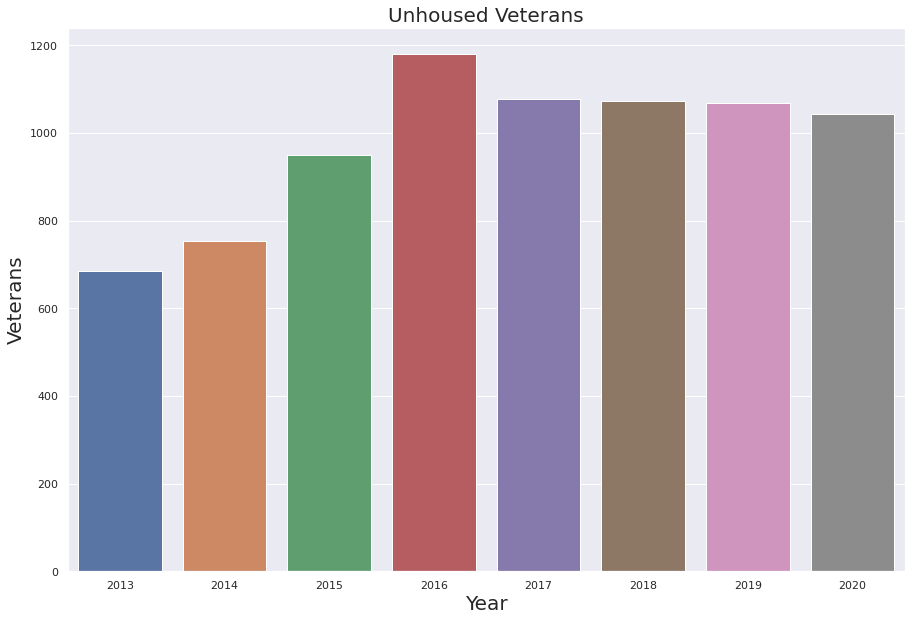

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(x = vet_count_df.index[2:], y=  vet_count_df['Homeless Veterans'][2:], orient='v' );
plt.xticks(ticks = [0,1,2,3,4,5,6,7],labels =['2013','2014','2015','2016','2017','2018','2019','2020']);
plt.title('Unhoused Veterans', fontsize = (20))
plt.ylabel('Veterans', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

Text(0.5, 1.0, 'Homeless Veterans')

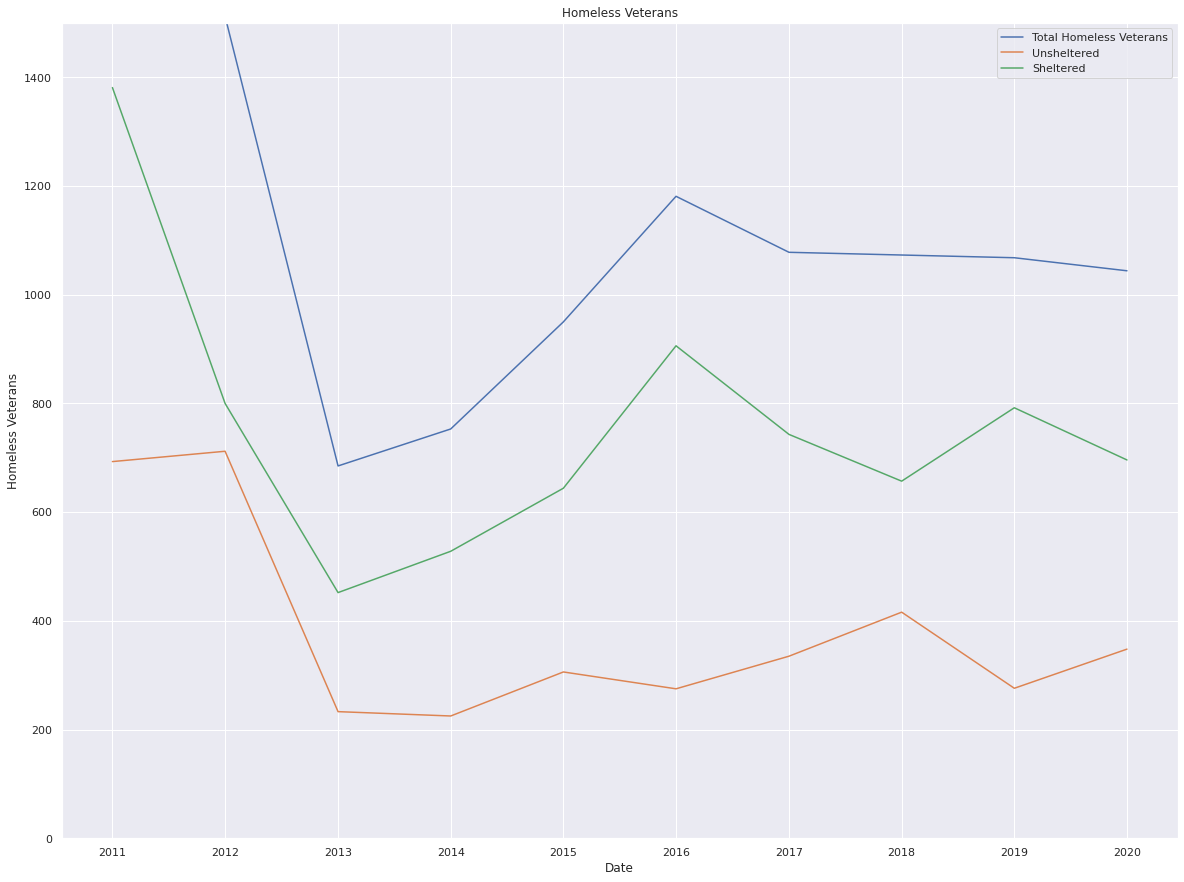

In [35]:
sns.set()
plt.figure(figsize = (20,15))
sns.lineplot(x = vet_count_df.index, y = vet_count_df['Homeless Veterans'], data = vet_count_df, label= 'Total Homeless Veterans')
sns.lineplot(x = vet_count_df.index, y = vet_count_df['Unsheltered Homeless Veterans'], data = vet_count_df, label = 'Unsheltered')
sns.lineplot(x = vet_count_df.index, y = vet_count_df['Sheltered Total Homeless Veterans'], data = vet_count_df, label = 'Sheltered')
plt.ylim(0,1500)

plt.title('Homeless Veterans')

In [ ]:
sns.bar(x = vet_count_df[''])